# 1- Important Packages and Classes

In [1351]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline 
import seaborn as sns 
import os
import re
pd.reset_option("display.max_rows", 10000)

# 2- Read DataSet

In [1352]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 3- EDA

In [1353]:
df.shape

(13320, 9)

- Data Countain (13320 Rows) and (9 Columns) 

In [1354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1355]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- we disvover nulls in data , Handling it By Median for every col

- Discover Important col for `price`

In [1356]:
correlation = df.corr()

In [1357]:
correlation['price'].sort_values(ascending=False)

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

- Let's visualize it for continuous Data For `price`

In [1358]:
# plt.figure(figsize=(12,12))
# plt.tight_layout()

# plt.subplot(2, 2, 1)
# plt.scatter(df['total_sqft'], df['price'], s=2, c='g')
# plt.title('total_sqft with price')

# plt.subplot(2, 2, 2)
# plt.scatter(df['bath'], df['price'], s=2, c='r')
# plt.title('bath with price')

# plt.subplot(2, 2, 3)
# plt.scatter(df['balcony'], df['price'], s=2, c='b')
# plt.title('balcony with price')

- discover unique cols

In [1359]:
for col in df.columns:

    if df[col].dtype == 'object':

        print(f"Unique values in column {col}: {df[col].unique()}")
        print('----------------------------------------------')


Unique values in column area_type: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
----------------------------------------------
Unique values in column availability: ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
----------------------------------------------
U

In [1360]:
for col in df.columns:

    if df[col].dtype == 'object':

        print(f"Unique values in column {col}: {df[col].nunique()}")
        print('----------------------------------------------')


Unique values in column area_type: 4
----------------------------------------------
Unique values in column availability: 81
----------------------------------------------
Unique values in column location: 1305
----------------------------------------------
Unique values in column size: 31
----------------------------------------------
Unique values in column society: 2688
----------------------------------------------
Unique values in column total_sqft: 2117
----------------------------------------------


if you want a good model you will make a good data so : 

- we will drop `avabiltity` , `balcony` and `society`

In [1361]:
df.drop(columns=['availability','society', 'balcony'], inplace=True)

- in `size` we discover bhk and bedroom 

In [1362]:
df['bhk'] = df['size'].astype(str).apply(lambda x: str(x.split(' ')[0]))

In [1363]:
df

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [1364]:
df['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

we discover 43 and 27

In [1365]:
df[df['bhk'] == '27']

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27


In [1366]:
df[df['bhk'] == '43']

,area_type,location,size,total_sqft,bath,price,bhk
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


- in `size` we discoverd 43 bedroom has `total_sqft` = 2400 , tis is not logic so we will fix it  

in `total_sqft` we discover that :

In [1367]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- 1133 - 1384 : this value is wrong we will fix it by (median) 

In [1368]:
def is_float(x):

    try:

        float(x)
    except:

        return False
    return True

In [1369]:
df[-df['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [1370]:
def convert_total_to_float(x):

    delete = x.split('-')

    if len(delete) == 2:

        return (float(delete[0]) + float(delete[1])) / 2
    
    try:
        return float(x)
    except:
        return None

In [1371]:
convert_total_to_float('2100 - 2850')

2475.0

In [1372]:
df1 = df.copy()

In [1373]:
df1

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [1374]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_total_to_float)

In [1375]:
df1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [1376]:
df1.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

we solved it succesfuly

In [1377]:
df1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [1378]:
df1.shape

(13320, 7)

- after we met business , he told the `total_sqft` for every `bhk` was '300' ,

so we can discover `total_sqft` under '300' and we will drop it becuase it not correct

In [1379]:
df1['total_sqft'] = pd.to_numeric(df1['total_sqft'], errors='coerce')
df1['bhk'] = pd.to_numeric(df1['bhk'], errors='coerce')

In [1380]:
df1['total_sqft_by_bhk'] = df1['total_sqft'] / df1['bhk']

In [1381]:
df1

,area_type,location,size,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,528.00
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,650.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,480.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,507.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,600.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,690.60
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,900.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,570.50
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,1172.25


In [1382]:
df2 = df1[-(df1['total_sqft'] / df1['bath'] < 300)]

- after discover we will droped it because it is not logic

In [1383]:
df2

,area_type,location,size,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,528.00
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,650.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,480.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,507.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,600.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,690.60
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,900.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,570.50
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,1172.25


- after that we will discover outliers for every cols

In [1384]:
df2.describe()

,total_sqft,bath,price,bhk,total_sqft_by_bhk
count,12637.000000,12610.000000,12683.000000,12667.000000,12621.000000
mean,1589.795745,2.560745,111.415057,2.673561,593.583542
std,1257.314256,1.075837,151.360479,1.008302,387.126346
min,300.000000,1.000000,8.440000,1.000000,150.000000
25%,1115.000000,2.000000,49.000000,2.000000,488.000000
50%,1300.000000,2.000000,70.000000,3.000000,561.666667
75%,1700.000000,3.000000,116.000000,3.000000,630.000000
max,52272.000000,16.000000,3600.000000,16.000000,26136.000000


In [1385]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12683 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          12683 non-null  object 
 1   location           12682 non-null  object 
 2   size               12667 non-null  object 
 3   total_sqft         12637 non-null  float64
 4   bath               12610 non-null  float64
 5   price              12683 non-null  float64
 6   bhk                12667 non-null  float64
 7   total_sqft_by_bhk  12621 non-null  float64
dtypes: float64(5), object(3)
memory usage: 891.8+ KB


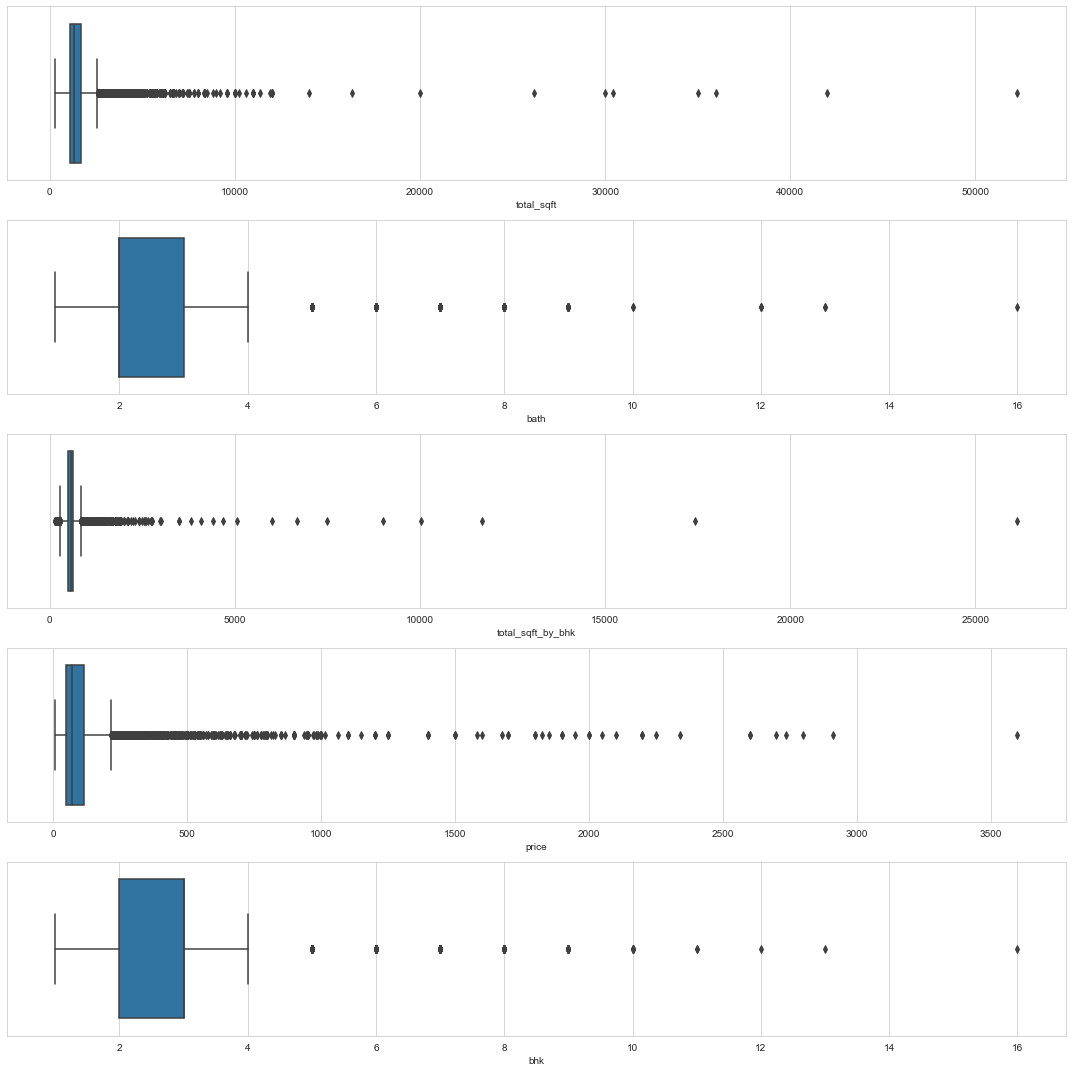

In [1386]:
plt.figure(figsize=(15, 15))

plt.subplot(5, 1, 1)  
sns.boxplot(x='total_sqft', data=df2)

plt.subplot(5, 1, 2)  
sns.boxplot(x='bath', data=df2)

plt.subplot(5, 1, 3)  
sns.boxplot(x='total_sqft_by_bhk', data=df2)

plt.subplot(5, 1, 4)  
sns.boxplot(x='price', data=df2)

plt.subplot(5, 1, 5)  
sns.boxplot(x='bhk', data=df2)

plt.tight_layout()
plt.show()

- we can see this all cols contain ouliers and we can handling it by `iqr` or `robust scaler` or `quantile`

# 4- PreProcessing

### 1- check duplicates in data 

In [1387]:
df2.duplicated(['location']).value_counts()

True     11453
False     1230
dtype: int64

In [1388]:
df3 = df2[df2.duplicated(keep='first', subset=['price', 'location', 'bhk'])] # save to pickle_file

In [1389]:
df3 = df2.drop_duplicates(keep='first', subset=['price', 'location', 'bhk'])

In [1390]:
df3

,area_type,location,size,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,528.000000
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,650.000000
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,480.000000
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,507.000000
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,600.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,571.666667
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,690.600000
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,900.000000
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,570.500000


In [1391]:
df3.duplicated().sum()

0

- we handling duplicates succesfully :)

### 2- check nulls in Data

In [1392]:
total_nulls = df3.isnull().sum()
percent_nulls = (total_nulls/df3.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
bath,70,0.687893
total_sqft_by_bhk,59,0.579796
total_sqft,43,0.422563
size,16,0.157233
bhk,16,0.157233
location,1,0.009827
area_type,0,0.000000
price,0,0.000000


- drop `size` because it is same with `bhk`

In [1393]:
df3.drop(columns=['size'], inplace=True)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1394]:
med_bath = df3['bath'].median()
med_bath

2.0

In [1395]:
df3['bath'].fillna(med_bath, inplace=True)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1396]:
med_total_sqft_by_bhk  = df3['total_sqft_by_bhk'].median()
med_total_sqft_by_bhk

560.5

In [1397]:
df3['total_sqft_by_bhk'].fillna(med_total_sqft_by_bhk, inplace=True)

In [1398]:
med_total_sqft	= df3['total_sqft'].median()
med_total_sqft

1314.0

In [1399]:
df3['total_sqft'].fillna(med_total_sqft, inplace=True)

we will discover null in `bhk` 

In [1400]:
df3[df3['bhk'].isnull()]

,area_type,location,total_sqft,bath,price,bhk,total_sqft_by_bhk
579,Plot Area,Sarjapur Road,1800.0,2.0,34.185,NaN,560.5
1775,Plot Area,IVC Road,3817.0,2.0,124.000,NaN,560.5
2264,Plot Area,Banashankari,2400.0,2.0,460.000,NaN,560.5
2809,Plot Area,Sarjapur Road,1800.0,2.0,28.785,NaN,560.5
2862,Plot Area,Devanahalli,1950.0,2.0,46.800,NaN,560.5
5333,Plot Area,Devanahalli,3752.5,2.0,177.115,NaN,560.5
6423,Plot Area,Whitefield,2324.0,2.0,26.730,NaN,560.5
6636,Plot Area,Jigani,1500.0,2.0,25.490,NaN,560.5
6719,Plot Area,Hoskote,1730.0,2.0,28.545,NaN,560.5
7680,Plot Area,Kasavanhalli,5000.0,2.0,400.000,NaN,560.5


In [1401]:
med_bhk= df3[(df3['total_sqft'] / df3['total_sqft_by_bhk'] <= 2000)]['bhk'].median()
med_bhk

3.0

In [1402]:
df3['bhk'].fillna(med_bhk, inplace=True)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1403]:
df3[df3['location'].isnull()]

,area_type,location,total_sqft,bath,price,bhk,total_sqft_by_bhk
568,Super built-up Area,NaN,1600.0,3.0,86.0,3.0,533.333333


In [1404]:
Mode = df3['location'].mode()
Mode

0    Whitefield
dtype: object

In [1405]:
df3['location'].fillna('Whitefield', inplace=True)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1406]:
df3.isnull().sum()

area_type            0
location             0
total_sqft           0
bath                 0
price                0
bhk                  0
total_sqft_by_bhk    0
dtype: int64

- we handling nulls succesfully :)


### 3- check outliers in Data

In [1407]:
numeric_col = df3.select_dtypes(include=['float64'])

In [1408]:
numeric_col

,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,1056.0,2.0,39.07,2.0,528.000000
1,2600.0,5.0,120.00,4.0,650.000000
2,1440.0,2.0,62.00,3.0,480.000000
3,1521.0,3.0,95.00,3.0,507.000000
4,1200.0,2.0,51.00,2.0,600.000000
...,...,...,...,...,...
13314,1715.0,3.0,112.00,3.0,571.666667
13315,3453.0,4.0,231.00,5.0,690.600000
13316,3600.0,5.0,400.00,4.0,900.000000
13317,1141.0,2.0,60.00,2.0,570.500000


In [1409]:
for col in numeric_col:

    quantiles = df3[col].quantile([.05 , .15, .50, .95, .99])
    print(f"Quantiles for {col}:")
    print(quantiles)
    print("--------------------")

Quantiles for total_sqft:
0.05     714.75
0.15    1020.00
0.50    1314.00
0.95    3500.00
0.99    5485.00
Name: total_sqft, dtype: float64
--------------------
Quantiles for bath:
0.05    1.0
0.15    2.0
0.50    2.0
0.95    5.0
0.99    6.0
Name: bath, dtype: float64
--------------------
Quantiles for price:
0.05     31.00
0.15     42.00
0.50     72.00
0.95    350.00
0.99    721.25
Name: price, dtype: float64
--------------------
Quantiles for bhk:
0.05    1.0
0.15    2.0
0.50    3.0
0.95    4.0
0.99    7.0
Name: bhk, dtype: float64
--------------------
Quantiles for total_sqft_by_bhk:
0.05     358.333333
0.15     441.666667
0.50     560.500000
0.95     930.000000
0.99    1465.416667
Name: total_sqft_by_bhk, dtype: float64
--------------------


In [1410]:
df3['bhk'].quantile([.05 , .15, .50, .95, .99])

0.05    1.0
0.15    2.0
0.50    3.0
0.95    4.0
0.99    7.0
Name: bhk, dtype: float64

In [1411]:
df3

,area_type,location,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,528.000000
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,650.000000
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,480.000000
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,507.000000
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,600.000000
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0,571.666667
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5.0,690.600000
13316,Super built-up Area,Richards Town,3600.0,5.0,400.00,4.0,900.000000
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,570.500000


In [1412]:
def detect_outliers_iqr_and_Treat(DataFrame,Feature):
    outliers = []
    
    data = sorted(DataFrame[Feature])
    print("Feature name is ",Feature)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lower_limit = q1-(1.5*IQR)
    upper_limit = q3+(1.5*IQR)
    print('lower limit: ', lower_limit)
    print('upper limit: ', upper_limit)
    print('IQR:' , IQR)
    
    for i in data: 
        if ((i<lower_limit) or (i>upper_limit)):
            outliers.append(i)
    if len(outliers)>0:        
        print("Outliers from IQR method: ", outliers[:5])

        #Capping  
        DataFrame_c = DataFrame.copy()
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]>upper_limit, upper_limit , DataFrame_c[Feature]) 
        DataFrame_c[Feature] = np.where(DataFrame_c[Feature]<lower_limit , lower_limit , DataFrame_c[Feature])

        #compare
        plt.figure(figsize=(15,5))

        plt.subplot(2,2,1)
        sns.displot(DataFrame[Feature])

        plt.subplot(2,2,2)
        sns.boxplot(DataFrame[Feature])

        plt.subplot(2,2,3)
        sns.displot(DataFrame_c[Feature])

        plt.subplot(2,2,4)
        sns.boxplot(DataFrame_c[Feature])
        plt.show()
        
        return outliers,DataFrame_c
    else:
        print("This feature has no Outliers from IQR method")
        return outliers,DataFrame

_________________________________________________________________________________________
Feature name is  price
lower limit:  -62.5
upper limit:  237.5
IQR: 75.0
Outliers from IQR method:  [238.0, 239.0, 239.0, 239.0, 239.0]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


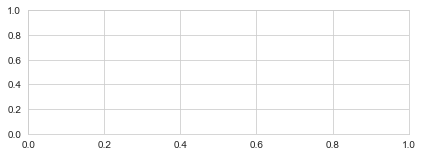

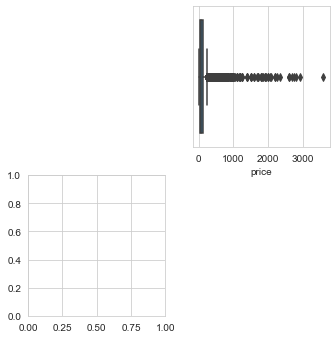

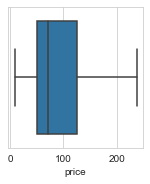

_________________________________________________________________________________________
Feature name is  total_sqft
lower limit:  177.5
upper limit:  2677.5
IQR: 625.0
Outliers from IQR method:  [2679.0, 2689.0, 2689.0, 2690.0, 2690.0]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


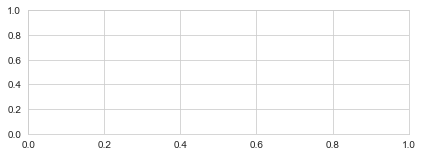

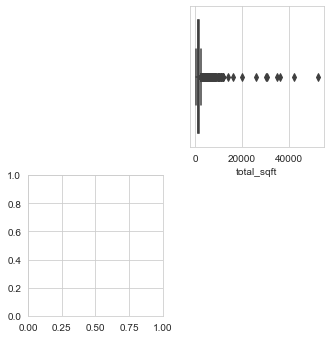

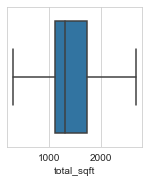

_________________________________________________________________________________________
Feature name is  total_sqft_by_bhk
lower limit:  261.14583333333337
upper limit:  861.9791666666666
IQR: 150.20833333333331
Outliers from IQR method:  [150.0, 150.0, 150.0, 150.0, 150.0]


c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\MEGASTORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


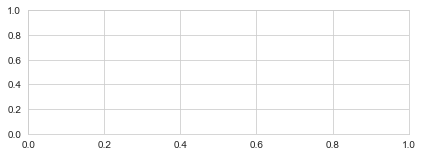

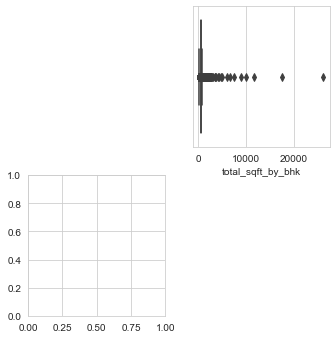

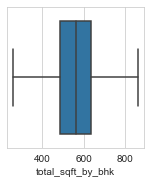

In [1413]:
df4 = df3.copy()
outliers_dict_Auto = {}
cols_to_check = ['price', 'total_sqft', 'total_sqft_by_bhk']
for col in cols_to_check:
    print("_________________________________________________________________________________________")
    outliers,df4 = detect_outliers_iqr_and_Treat(df4,col)
    outliers_dict_Auto[col+"_outliers"]=outliers

In [1414]:
df4

,area_type,location,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,528.000000
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,650.000000
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,480.000000
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,507.000000
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,600.000000
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0,571.666667
13315,Built-up Area,Whitefield,2677.5,4.0,231.00,5.0,690.600000
13316,Super built-up Area,Richards Town,2677.5,5.0,237.50,4.0,861.979167
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,570.500000


In [1415]:
df4.describe()

,total_sqft,bath,price,bhk,total_sqft_by_bhk
count,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000
mean,1487.068181,2.597779,96.341217,2.719733,571.526484
std,567.204877,1.133311,64.489276,1.068958,136.029918
min,300.000000,1.000000,8.440000,1.000000,261.145833
25%,1115.000000,2.000000,50.000000,2.000000,486.458333
50%,1314.000000,2.000000,72.000000,3.000000,560.500000
75%,1740.000000,3.000000,125.000000,3.000000,636.666667
max,2677.500000,16.000000,237.500000,16.000000,861.979167


In [1416]:
for col in numeric_col:

    quantiles = df4[col].quantile([.05 , .15, .50, .95, .99])
    print(f"Quantiles for {col}:")
    print(quantiles)
    print("--------------------")

Quantiles for total_sqft:
0.05     714.75
0.15    1020.00
0.50    1314.00
0.95    2677.50
0.99    2677.50
Name: total_sqft, dtype: float64
--------------------
Quantiles for bath:
0.05    1.0
0.15    2.0
0.50    2.0
0.95    5.0
0.99    6.0
Name: bath, dtype: float64
--------------------
Quantiles for price:
0.05     31.0
0.15     42.0
0.50     72.0
0.95    237.5
0.99    237.5
Name: price, dtype: float64
--------------------
Quantiles for bhk:
0.05    1.0
0.15    2.0
0.50    3.0
0.95    4.0
0.99    7.0
Name: bhk, dtype: float64
--------------------
Quantiles for total_sqft_by_bhk:
0.05    358.333333
0.15    441.666667
0.50    560.500000
0.95    861.979167
0.99    861.979167
Name: total_sqft_by_bhk, dtype: float64
--------------------


# 5- Analysis and Visualization

### 1- check distribution of Data

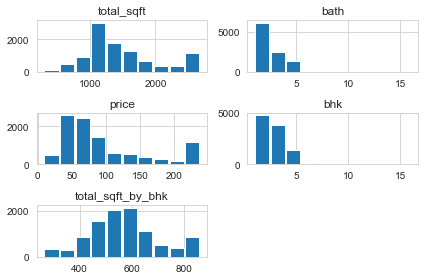

In [1417]:
df4.hist(rwidth=0.9)
plt.tight_layout()

- Data Normally distributed , so we will use standard scaler

### 2- more analysis for Data 

In [1418]:
df4

,area_type,location,total_sqft,bath,price,bhk,total_sqft_by_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,528.000000
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,650.000000
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,480.000000
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,507.000000
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,600.000000
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0,571.666667
13315,Built-up Area,Whitefield,2677.5,4.0,231.00,5.0,690.600000
13316,Super built-up Area,Richards Town,2677.5,5.0,237.50,4.0,861.979167
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0,570.500000


- 1- what the avg for `price` ?

In [1419]:
df4['price'].median()

72.0

- 2- what the avg for `total_sqft_by_bhk` ?

In [1420]:
df4['total_sqft_by_bhk'].median()

560.5

- 3- what is the avg `price` per every `area_type` ?

In [1421]:
df4.groupby('area_type')['price'].median()

area_type
Built-up  Area           70.0
Carpet  Area             70.0
Plot  Area              150.0
Super built-up  Area     65.0
Name: price, dtype: float64

- 4- what is the avg `price` for per `location` ?

In [1422]:
df4.groupby('location')['price'].median()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Devarabeesana Halli    149.50
 Devarachikkanahalli     61.50
                         ...  
sarjapura main road     237.50
singapura paradise      140.00
tc.palya                 58.50
white field,kadugodi    237.50
whitefiled               32.73
Name: price, Length: 1229, dtype: float64

- 5- what is the lowest `price` of `location` ?

In [1423]:
df4.groupby('price')['location'].min()

price
8.44                Hosur Road
9.00                Chandapura
10.00                 Attibele
10.25                 Attibele
10.50            Doddaballapur
                  ...         
233.00    2nd Stage Nagarbhavi
234.00              Binny Pete
235.00     1st Block Jayanagar
237.00            Malleshwaram
237.50     Sector 1 HSR Layout
Name: location, Length: 1723, dtype: object

- - Hosur Road is the lowest location price

- 6- what is the highest `price` of `location` ?

In [1424]:
df4.groupby('price')['location'].max()

price
8.44                Hosur Road
9.00                Chandapura
10.00                  Kengeri
10.25                 Attibele
10.50            Doddaballapur
                  ...         
233.00       Mahalakshmi Puram
234.00              Whitefield
235.00          Thigalarapalya
237.00          Thigalarapalya
237.50    white field,kadugodi
Name: location, Length: 1723, dtype: object

- - white field,kadugodi is the highest location price

- 7- what is the highest `total_sqft_by_bhk` per `location` ?

In [1425]:
df4.groupby('total_sqft_by_bhk')['location'].max()

total_sqft_by_bhk
261.145833       Yeshwanthpur
262.500000    Nagadevanahalli
266.666667       Yeshwanthpur
267.500000           Sarjapur
267.857143         Srirampura
                   ...       
857.333333         Cooke Town
857.500000     Sarjapur  Road
859.000000       Rajaji Nagar
860.666667       Banashankari
861.979167         frazertown
Name: location, Length: 1513, dtype: object

- - frazertown had a highest `total_sqft_by_bhk`

- 8- what is the lowest `total_sqft_by_bhk` per `location` ?

In [1426]:
df4.groupby('total_sqft_by_bhk')['location'].min()

total_sqft_by_bhk
261.145833                 ittamadu
262.500000    Banashankari Stage II
266.666667             Ashwathnagar
267.500000                 Sarjapur
267.857143              Kalasipalya
                      ...          
857.333333               Cooke Town
857.500000           Sarjapur  Road
859.000000              Frazer Town
860.666667             Banashankari
861.979167      Sector 1 HSR Layout
Name: location, Length: 1513, dtype: object

- - ittamadu had a lowest `total_sqft_by_bhk`

- 9- what is the average of `total_sqft` for every `area_type` ?

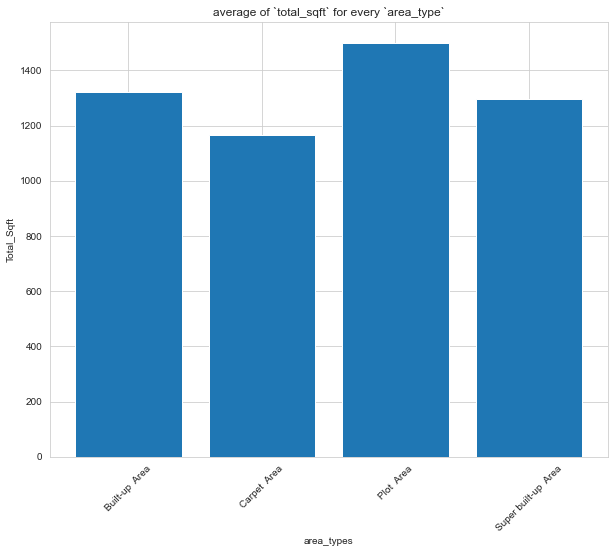

In [1427]:
plt.figure(figsize=(10, 8))
avg_total_sqft = df4.groupby('area_type')['total_sqft'].median()

plt.bar(avg_total_sqft.index, avg_total_sqft.values) 

plt.xticks(rotation=45) 
plt.xlabel('area_types') 
plt.ylabel('Total_Sqft') 
plt.title('average of `total_sqft` for every `area_type`') 
plt.show()

- - `plot Area` is the most avg in `area_type`

- by Pie Chart

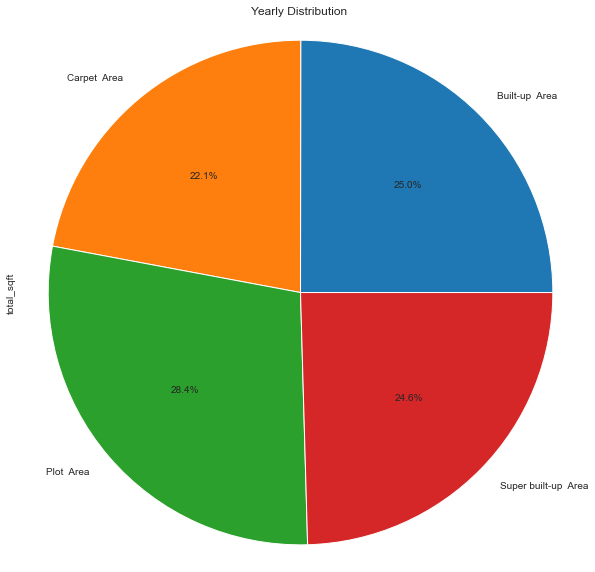

In [1428]:
plt.figure(facecolor='white', figsize=(10, 10)) 
avg_total_sqft.plot(kind="pie",autopct='%1.1f%%')
plt.title("Yearly Distribution")
plt.axis('equal')
plt.show()

- - Plot Area had a (28.4%) `total_sqft`

- 10- what is the top `area_type` by `price` ?

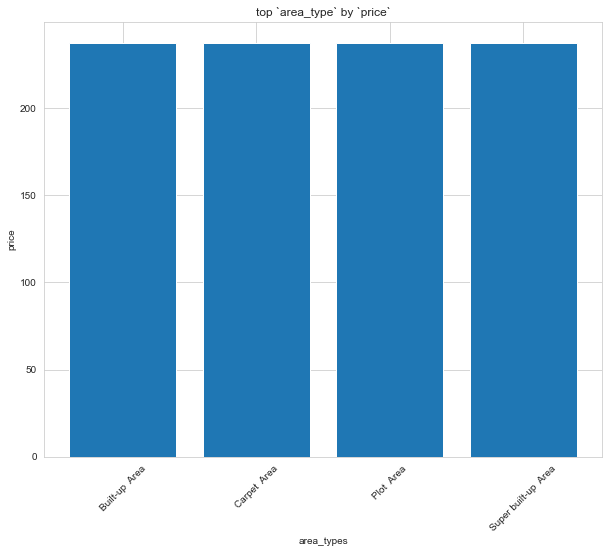

In [1429]:
plt.figure(figsize=(10, 8))
avg_price_Area = df4.groupby('area_type')['price'].max()

plt.bar(avg_price_Area.index, avg_price_Area.values) 

plt.xticks(rotation=45) 
plt.xlabel('area_types') 
plt.ylabel('price') 
plt.title('top `area_type` by `price`') 
plt.show()

- - i think its no difference for every area_Type

- 11- Average for every col by `area_type` ?

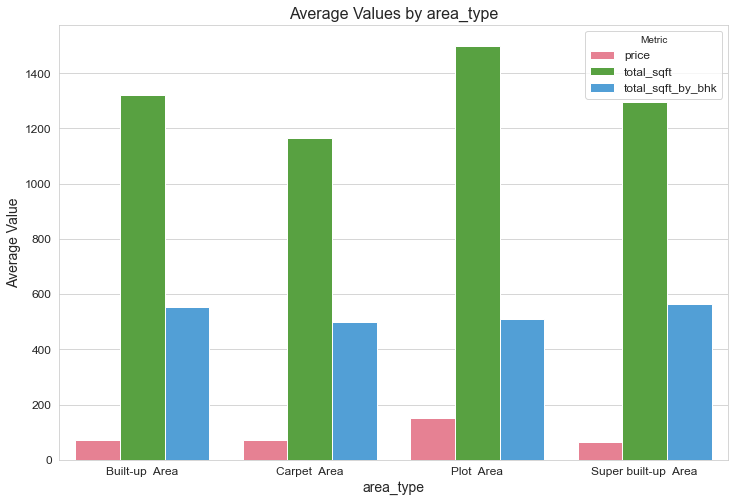

In [1430]:
cols = ['price', 'total_sqft', 'total_sqft_by_bhk']
avg_values_by_area_Type = df4.groupby('area_type')[cols].median().reset_index()
avg_values_melted = avg_values_by_area_Type.melt(id_vars='area_type', var_name='Metric', value_name='AverageValue')
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='area_type', y='AverageValue', hue='Metric', data=avg_values_melted, palette='husl')
plt.title('Average Values by area_type', fontsize=16)
plt.xlabel('area_type', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- 12- what is the correlation for every columns ?

<function matplotlib.pyplot.show(close=None, block=None)>

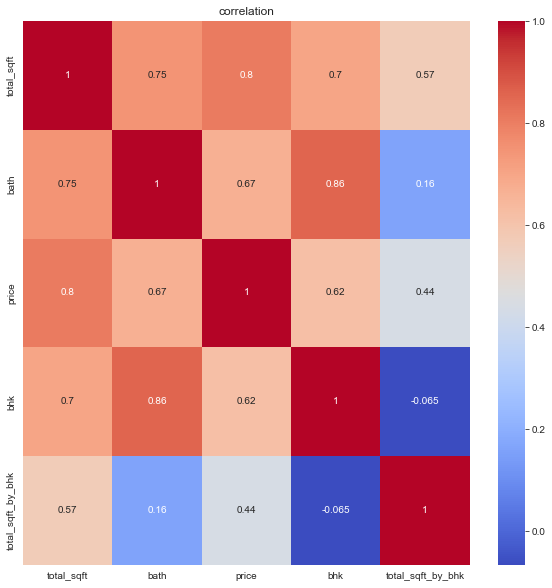

In [1431]:
correlation =  df4.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show

# 6- Buliding Model

In [1432]:
correlation =  df4.corr()
correlation['price'].sort_values(ascending=False)

price                1.000000
total_sqft           0.804681
bath                 0.669217
bhk                  0.620078
total_sqft_by_bhk    0.442269
Name: price, dtype: float64

- we can drop `total_sqft_by_bhk` to fit a good model and its not important with Label

In [1433]:
df4.drop(columns=['total_sqft_by_bhk'], inplace=True)

In [1434]:
df4

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0
13315,Built-up Area,Whitefield,2677.5,4.0,231.00,5.0
13316,Super built-up Area,Richards Town,2677.5,5.0,237.50,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


- after meeting business , he told the bath of bhk more than 2 , we will remove it 

In [1435]:
df4[df4['bath'] > df4['bhk'] +2]

,area_type,location,total_sqft,bath,price,bhk
2620,Super built-up Area,Sathya Sai Layout,2677.5,9.0,237.5,6.0
6838,Super built-up Area,Rajaji Nagar,2677.5,8.0,237.5,5.0
7709,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4.0
9974,Plot Area,Sector 1 HSR Layout,2400.0,6.0,237.5,3.0
11366,Built-up Area,Nagasandra,2677.5,8.0,237.5,4.0
12103,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3.0
12443,Plot Area,Dollars Colony,2677.5,8.0,237.5,4.0
13067,Plot Area,Defence Colony,2677.5,13.0,237.5,10.0


In [1436]:
df5 = df4[df4['bath'] < df4['bhk'] +2]
df5

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0
13315,Built-up Area,Whitefield,2677.5,4.0,231.00,5.0
13316,Super built-up Area,Richards Town,2677.5,5.0,237.50,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


- fix unique values in `location` before encoding

<AxesSubplot:>

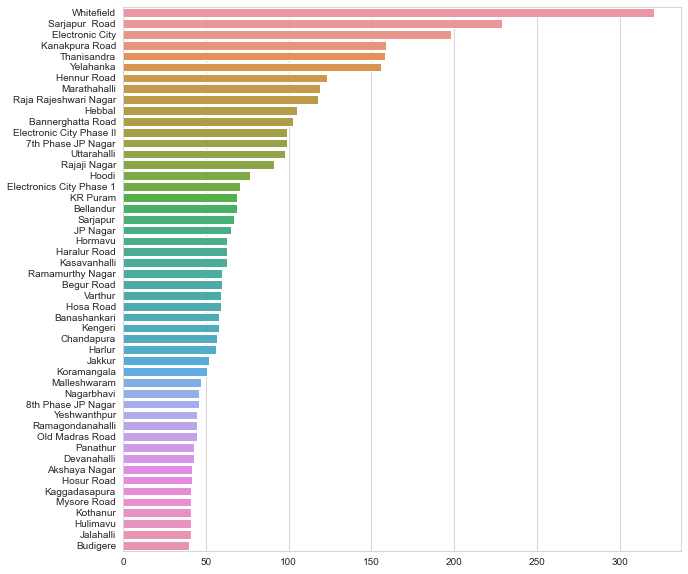

In [1437]:
plt.figure(figsize=(10, 10))
top_VAlues = df5['location'].value_counts().nlargest(50)
sns.barplot(x=top_VAlues.values, y=top_VAlues.index)

In [1438]:
df5['location'] = df5['location'].astype(str)

df6 = df5[df5['location'] > 'Budigere']

C:\Users\MEGAST~1\AppData\Local\Temp/ipykernel_8356/2043726642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].astype(str)


In [1439]:
df6

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,112.00,3.0
13315,Built-up Area,Whitefield,2677.5,4.0,231.00,5.0
13316,Super built-up Area,Richards Town,2677.5,5.0,237.50,4.0
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


- we will fix `area_type` by encoding

In [1440]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8107 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   8107 non-null   object 
 1   location    8107 non-null   object 
 2   total_sqft  8107 non-null   float64
 3   bath        8107 non-null   float64
 4   price       8107 non-null   float64
 5   bhk         8107 non-null   float64
dtypes: float64(4), object(2)
memory usage: 443.4+ KB


In [1441]:
obj_columns = list(df6.select_dtypes(include=['object']).columns)
obj_columns

['area_type', 'location']

In [1442]:
df6['location'].value_counts(ascending=False)

Whitefield               321
Sarjapur  Road           229
Electronic City          198
Kanakpura Road           159
Thanisandra              158
                        ... 
Maruthi Extension          1
Okalipura                  1
Vasantapura main road      1
Rajarajeshwarinagar        1
Havanur extension          1
Name: location, Length: 970, dtype: int64

In [1443]:
df7 = pd.get_dummies(df6, columns=obj_columns, drop_first=True)

In [1444]:
df7

,total_sqft,bath,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_Byadarahalli,location_Byagadadhenahalli,location_Byappanahalli,...,location_poornaprajna layout,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_tc.palya,"location_white field,kadugodi",location_whitefiled
0,1056.0,2.0,39.07,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,112.00,3.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,2677.5,4.0,231.00,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,2677.5,5.0,237.50,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1- Split Data to X , Y

In [1445]:
X = df7.drop(columns=['price'])
y = df7['price']

In [1446]:
X.shape

(8107, 975)

In [1447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1448]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [1449]:
r_seq = regressor.score(X_train, y_train)
r_seq

0.8423048219320538

In [1450]:
y_pred = regressor.predict(X_test)
y_pred

array([ 86.52688888,  47.17376267, 101.92688377, ..., 133.76928561,
        78.37858714,  59.12866038])

In [1451]:
r_seq = regressor.score(X_test, y_test)
r_seq

0.7514827614681997

In [1452]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 22
Mean Squared Error: 961.3191561983846
Root Mean Squared Error 31
Coefficient of determination: 0.7514827614681997


### 2- Check the Model has overfitting or no 

In [1453]:
print('training score is:{:.3f}'.format(regressor.score(X_train, y_train)))
print('test score is: {:.3f}'.format(regressor.score(X_test, y_test)))

training score is:0.842
test score is: 0.751


- No OverFitting

### 3- Try Prediction

In [1454]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]    

In [1455]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'location_Byadarahalli', 'location_Byagadadhenahalli',
       'location_Byappanahalli', 'location_Byatarayanapura',
       ...
       'location_poornaprajna layout',
       'location_ravindra nagar, T.dasarahalli peenya', 'location_rr nagar',
       'location_sankeswari', 'location_sapthagiri Layout',
       'location_sarjapura main road', 'location_singapura paradise',
       'location_tc.palya', 'location_white field,kadugodi',
       'location_whitefiled'],
      dtype='object', length=975)

In [1456]:
predict_price('location_Byrasandra Extension', 1000, 2, 2)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.60493916410666

In [1457]:
predict_price('location_Byrasandra Extension', 1000, 3, 3)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.00870180137622

In [1459]:
predict_price('location_whitefiled', 1000, 2, 2)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.02207176133655

In [1458]:
predict_price('location_whitefiled', 1000, 3, 3)

c:\Users\MEGASTORE\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.42583439860611